In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df1=pd.read_csv('AAPL (4).csv')
df2=pd.read_csv('MSFT (2).csv')
df3=pd.read_csv('RELIANCE.NS (2).csv')
df4=pd.read_csv('AMZN.csv')

In [ ]:
#Apple
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-23,26.817499,27.212500,26.799999,27.152500,24.857616,130629600
1,2015-12-24,27.250000,27.250000,26.987499,27.007500,24.724871,54281600
2,2015-12-28,26.897499,26.922501,26.545000,26.705000,24.447943,106816800
3,2015-12-29,26.740000,27.357500,26.715000,27.184999,24.887367,123724800
4,2015-12-30,27.145000,27.174999,26.795000,26.830000,24.562374,100855200
...,...,...,...,...,...,...,...
1758,2022-12-16,136.690002,137.649994,133.729996,134.509995,134.509995,160080100
1759,2022-12-19,135.110001,135.199997,131.320007,132.369995,132.369995,79592600
1760,2022-12-20,131.389999,133.250000,129.889999,132.300003,132.300003,77432800
1761,2022-12-21,132.979996,136.809998,132.750000,135.449997,135.449997,85928000


In [ ]:
df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1758,2022-12-16,136.690002,137.649994,133.729996,134.509995,134.509995,160080100
1759,2022-12-19,135.110001,135.199997,131.320007,132.369995,132.369995,79592600
1760,2022-12-20,131.389999,133.250000,129.889999,132.300003,132.300003,77432800
1761,2022-12-21,132.979996,136.809998,132.750000,135.449997,135.449997,85928000
1762,2022-12-22,134.350006,134.559998,130.300003,132.229996,132.229996,77714600


In [ ]:
df11 = df1[['Adj Close']]
df11[['Adj Close']].tail()

,Adj Close
1758,134.509995
1759,132.369995
1760,132.300003
1761,135.449997
1762,132.229996


In [ ]:
df11['prediction1'] = df11[['Adj Close']].shift(-15)
print(df11)

       Adj Close  prediction1
0      24.857616    22.230181
1      24.724871    22.122614
2      24.447943    22.152365
3      24.887367    22.040222
4      24.562374    23.212038
...          ...          ...
1758  134.509995          NaN
1759  132.369995          NaN
1760  132.300003          NaN
1761  135.449997          NaN
1762  132.229996          NaN

[1763 rows x 2 columns]


<ipython-input-9-0cf44de2df89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['prediction1'] = df11[['Adj Close']].shift(-15)


In [ ]:
#Create a data set X and convert it into numpy array , which will be having actual values
X1 = np.array(df11.drop(['prediction1'],1))
#removing last 15 rows
X1 = X1[:-15]
print(X1)

NameError: ignored

In [ ]:
#Create a dataset y which will be having Predicted values and convert into numpy array
y1 = np.array(df11['prediction1'])
#remove last 15 rows
y1 = y1[:-15]
print(y1)

[ 22.230181  22.122614  22.152365 ... 132.300003 135.449997 132.229996]


In [ ]:
# Spliting the data into train and test with 90 & 10 % respectively
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1)

In [ ]:
# SVM Model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
#training the model
svr.fit(x1_train, y1_train)

SVR(C=1000.0, gamma=0.1)

In [ ]:
#Apple
# The best possible score is 1.0
svm_confidence1 = svr.score(x1_test, y1_test)
print("svm_confidence1:", svm_confidence1)

svm_confidence1: 0.9820197935948675


In [ ]:
y1_pred = svr.predict(x1_test)

In [ ]:
print(y1_pred)

[167.96131326 130.40564637  50.34960275  45.99016916 132.63871131
  53.14781785  26.42224613  41.26050628  74.76835205 148.3866799
 168.4024377   53.12068967  41.95037249 130.35736697  34.99495044
  28.12535591  53.83508884  46.745271    46.22764565  23.34131147
  46.07258647 147.18163258 145.3079525   23.05737753  42.0376963
  40.82758482  57.63612263  49.95568443  41.40901651 147.17948083
 148.25982127  70.22308759 114.65461131  50.1274887   25.61659419
  41.30154402 132.41832678 167.8785965  124.51984216  28.09063843
 140.27573428 120.96004747  41.22133076  27.83604189  38.54570937
 155.5269938  134.48884777  34.82537472  35.96496859 170.23108796
  25.33011462  76.20171485  64.92151529 128.53941396  41.193159
  25.969936   160.98567632  46.26608571 132.19793214  64.73917363
  26.76742201  25.61962718  79.41120569 124.63142253  41.53367902
  41.47282407  50.82223041  37.59302491  46.22196778  26.07355574
  28.26723688  34.83424876  41.45031002 146.5236025   49.96785921
  69.17899749 

In [ ]:
y1_pred = svr.predict(x1_test)
accuracy_score1 = int(svm_confidence1*100-10)

In [ ]:
print("accuracy_score1:",accuracy_score1)

accuracy_score1: 88


In [ ]:
#This is the latest 15 days stock prices, we will use these values to predict next 15 days prices
forecast1 = np.array(df11.drop(['prediction1'],1))[-15:]
print(forecast1)

[[147.809998]
 [146.630005]
 [142.910004]
 [140.940002]
 [142.649994]
 [142.160004]
 [144.490005]
 [145.470001]
 [143.210007]
 [136.5     ]
 [134.509995]
 [132.369995]
 [132.300003]
 [135.449997]
 [132.229996]]


<ipython-input-19-d3c9c8e9e94f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  forecast1 = np.array(df11.drop(['prediction1'],1))[-15:]


Text(0, 0.5, 'Price')

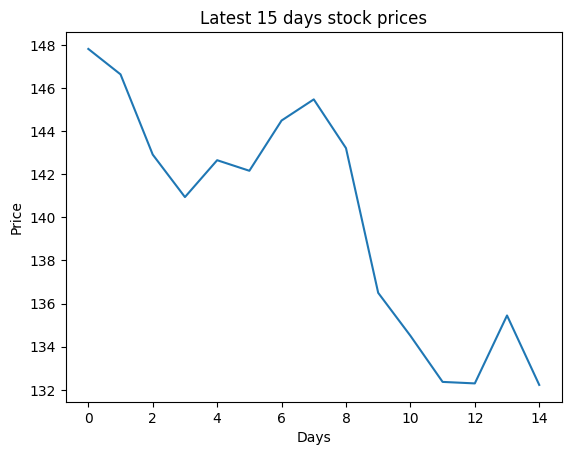

In [ ]:
plt.plot(forecast1)
plt.title("Latest 15 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')

In [ ]:
#Apple
#Predicted Values for next 15 days stock prices
svm_prediction1 = svr.predict(forecast1)
print(svm_prediction1)

[146.50701275 148.24419792 144.16651441 147.07536065 144.37602736
 144.98928325 146.34160586 148.93594696 144.08565404 140.79327944
 126.52546948 132.5566822  133.11713798 135.4531964  133.64183145]


Text(0, 0.5, 'Price')

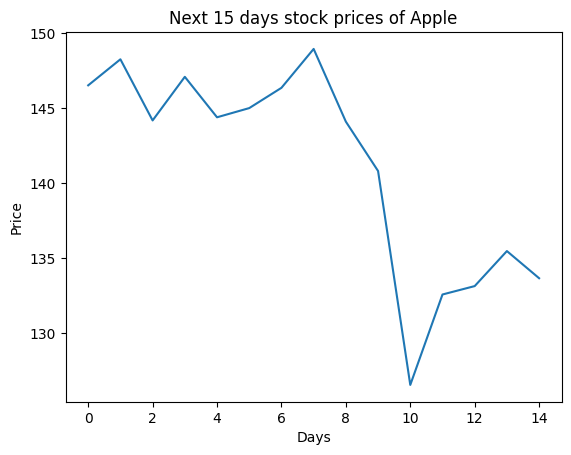

In [ ]:
plt.plot(svm_prediction1)
plt.title("Next 15 days stock prices of Apple")
plt.xlabel('Days')
plt.ylabel('Price')

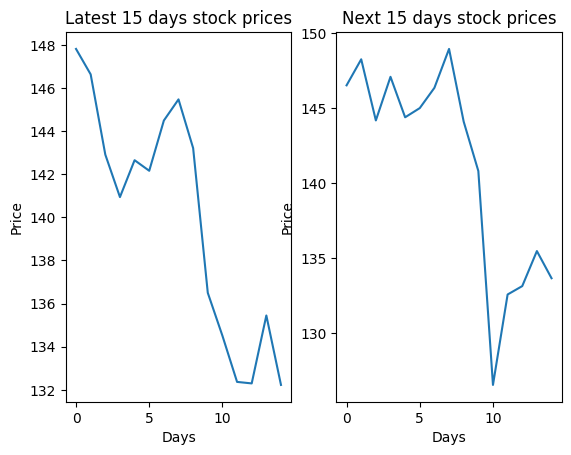

In [ ]:
#plotting and comparing stock prices
plt.subplot(1,2,1)
plt.plot(forecast1)
plt.title("Latest 15 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.plot(svm_prediction1)
plt.title("Next 15 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [ ]:
#Amazom
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-24,97.680000,97.970001,93.980003,94.129997,90.178154,43935200
1,2018-12-26,95.139999,100.690002,93.959999,100.559998,96.338211,51634800
2,2018-12-27,99.300003,101.190002,96.400002,101.180000,96.932175,49498500
3,2018-12-28,102.089996,102.410004,99.519997,100.389999,96.175346,38196300
4,2018-12-31,101.290001,102.400002,100.440002,101.570000,97.305817,33173800
...,...,...,...,...,...,...,...
1003,2022-12-16,248.550003,249.839996,243.509995,244.690002,244.690002,86088100
1004,2022-12-19,244.860001,245.210007,238.710007,240.449997,240.449997,29696400
1005,2022-12-20,239.399994,242.910004,238.419998,241.800003,241.800003,25150800
1006,2022-12-21,241.690002,245.619995,240.110001,244.429993,244.429993,23690600


In [ ]:
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1003,2022-12-16,248.550003,249.839996,243.509995,244.690002,244.690002,86088100
1004,2022-12-19,244.860001,245.210007,238.710007,240.449997,240.449997,29696400
1005,2022-12-20,239.399994,242.910004,238.419998,241.800003,241.800003,25150800
1006,2022-12-21,241.690002,245.619995,240.110001,244.429993,244.429993,23690600
1007,2022-12-22,241.259995,241.990005,233.869995,238.190002,238.190002,28641100


In [ ]:
df22 = df2[['Adj Close']]
df22[['Adj Close']].tail()

,Adj Close
1003,244.690002
1004,240.449997
1005,241.800003
1006,244.429993
1007,238.190002


In [ ]:
df22['prediction2'] = df22[['Adj Close']].shift(-15)
print(df22)

       Adj Close  prediction2
0      90.178154   100.955826
1      96.338211   101.664772
2      96.932175   103.188019
3      96.175346   101.243248
4      97.305817   102.230026
...          ...          ...
1003  244.690002          NaN
1004  240.449997          NaN
1005  241.800003          NaN
1006  244.429993          NaN
1007  238.190002          NaN

[1008 rows x 2 columns]


<ipython-input-27-f9d083323956>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['prediction2'] = df22[['Adj Close']].shift(-15)


In [ ]:
#Create a data set X and convert it into numpy array , which will be having actual values
X2 = np.array(df22.drop(['prediction2'],1))
#removing last 15 rows
X2 = X2[:-15]
print(X2)

[[ 90.178154]
 [ 96.338211]
 [ 96.932175]
 [ 96.175346]
 [ 97.305817]
 [ 96.874702]
 [ 93.310883]
 [ 97.650696]
 [ 97.77523 ]
 [ 98.484161]
 [ 99.892456]
 [ 99.25058 ]
 [ 98.484161]
 [ 97.765663]
 [100.601395]
 [100.955826]
 [101.664772]
 [103.188019]
 [101.243248]
 [102.230026]
 [101.741417]
 [102.6707  ]
 [100.668457]
 [ 98.618301]
 [101.913857]
 [100.045731]
 [ 98.465012]
 [101.300728]
 [102.718582]
 [101.578568]
 [100.850464]
 [101.233681]
 [100.831299]
 [102.402451]
 [102.325813]
 [102.412033]
 [103.676628]
 [103.628716]
 [103.089943]
 [105.264313]
 [106.765205]
 [107.361679]
 [108.102524]
 [107.919731]
 [107.785019]
 [108.266113]
 [108.006302]
 [107.467537]
 [107.515633]
 [106.207146]
 [106.322624]
 [108.554703]
 [109.314789]
 [110.161415]
 [110.248032]
 [111.518013]
 [113.115097]
 [113.192078]
 [113.066986]
 [115.664696]
 [112.614822]
 [113.201691]
 [113.442215]
 [112.345413]
 [112.499359]
 [113.471077]
 [114.510139]
 [114.673721]
 [115.424149]
 [114.837288]
 [115.347198]
 [115.

<ipython-input-28-8fa41297f1a0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2 = np.array(df22.drop(['prediction2'],1))


In [ ]:
#Create a dataset y which will be having Predicted values and convert into numpy array
y2 = np.array(df22['prediction2'])
#remove last 15 rows
y2 = y2[:-15]
print(y2)

[100.955826 101.664772 103.188019 101.243248 102.230026 101.741417
 102.6707   100.668457  98.618301 101.913857 100.045731  98.465012
 101.300728 102.718582 101.578568 100.850464 101.233681 100.831299
 102.402451 102.325813 102.412033 103.676628 103.628716 103.089943
 105.264313 106.765205 107.361679 108.102524 107.919731 107.785019
 108.266113 108.006302 107.467537 107.515633 106.207146 106.322624
 108.554703 109.314789 110.161415 110.248032 111.518013 113.115097
 113.192078 113.066986 115.664696 112.614822 113.201691 113.442215
 112.345413 112.499359 113.471077 114.510139 114.673721 115.424149
 114.837288 115.347198 115.385674 114.760307 115.635834 115.770538
 116.36702  116.463249 116.193855 117.155952 118.695335 119.070557
 120.686897 120.273193 124.256325 124.968246 124.852829 125.651398
 123.034439 121.427719 124.015778 123.294197 120.76387  120.754257
 120.744621 122.312859 118.676079 120.003807 121.693718 124.503838
 123.673347 121.886864 122.543518 123.287079 121.848244 121.90

In [ ]:
# Spliting the data into train and test with 90 & 10 % respectively
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1)

In [ ]:
# SVM Model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
#training the model
svr.fit(x2_train, y2_train)

SVR(C=1000.0, gamma=0.1)

In [ ]:
#Amazon
# The best possible score is 1.0
svm_confidence2 = svr.score(x2_test, y2_test)
print("svm_confidence2:", svm_confidence2)

svm_confidence2: 0.9501652316311157


In [ ]:
y2_pred = svr.predict(x2_test)

In [ ]:
print(y2_pred)

[211.07692111 311.92750529 237.23038315 294.90683681 289.28699405
 123.80350625 218.228448   160.15135579 134.40232622 178.69945935
 177.70990719 290.3954748  229.51984184 287.70887055 185.14818239
 251.74426738 102.40606515 179.52177185 186.47783275 161.67311803
 103.91588263 282.66873815 147.55614918 131.93515362 213.87383723
 237.90800178 342.47058878 274.14496905 227.78885643 291.08264425
 178.35571845 135.27639012 102.72676714 245.3399889  317.05879052
 286.83597083 180.37188513 164.48150985 134.3834207  283.07173682
 161.7901909  250.77013559 246.85457611 134.36540252 180.13620175
 212.29054985 293.50315163 281.56179321 206.92204168 178.66272395
 243.78305834 214.17120758 228.37825405 271.83572184 281.2719804
 282.94503543 247.324315   289.23761278 253.59450093 281.73632095
 105.54927998 221.448593   267.82660737 180.09554145 288.18569713
 325.35955062 164.2234782  116.3877486  122.82927562 178.80424342
 186.8399748  242.69279125 302.21643388 123.67179841 213.97093889
 309.515563

In [ ]:
y2_pred = svr.predict(x2_test)
accuracy_score2 = int(svm_confidence2*100)

In [ ]:
print("accuracy_score2:",accuracy_score2)

accuracy_score2: 95


In [ ]:
#This is the latest 15 days stock prices, we will use these values to predict next 15 days prices
forecast2 = np.array(df22.drop(['prediction2'],1))[-15:]
print(forecast2)

[[255.020004]
 [250.199997]
 [245.119995]
 [244.369995]
 [247.399994]
 [245.419998]
 [252.509995]
 [256.920013]
 [257.220001]
 [249.009995]
 [244.690002]
 [240.449997]
 [241.800003]
 [244.429993]
 [238.190002]]


<ipython-input-37-9c9c86fb31bb>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  forecast2 = np.array(df22.drop(['prediction2'],1))[-15:]


Text(0, 0.5, 'Price')

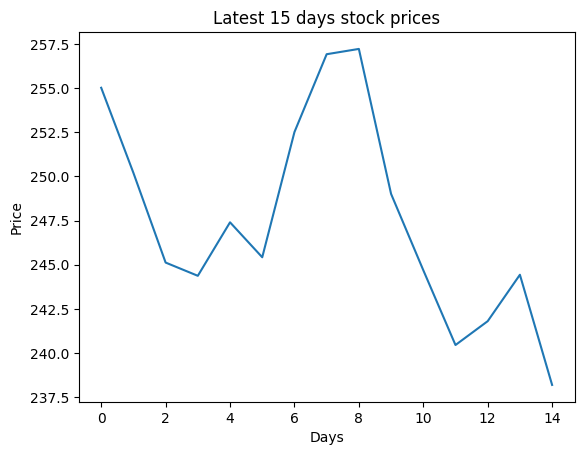

In [ ]:
plt.plot(forecast2)
plt.title("Latest 15 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')

In [ ]:
#Amazon
#Predicted Values for next 15 days stock prices
svm_prediction2 = svr.predict(forecast2)
print(svm_prediction2)

[257.70319911 247.07449461 251.2265784  252.29005302 249.27498555
 251.06691297 259.006471   243.12365892 244.86073614 249.04414972
 251.69737612 236.55137184 249.17756453 252.16380202 227.92916594]


Text(0, 0.5, 'Price')

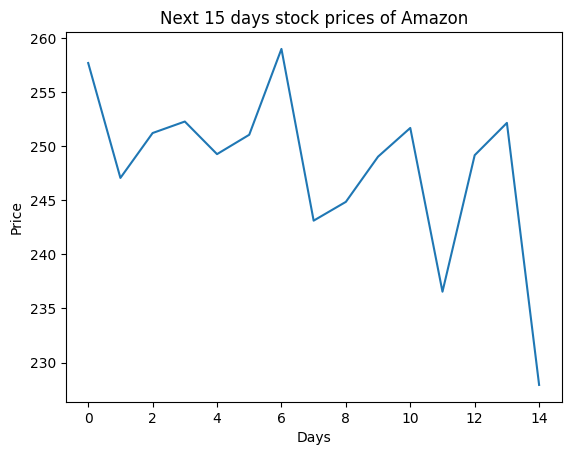

In [ ]:
plt.plot(svm_prediction2)
plt.title("Next 15 days stock prices of Amazon")
plt.xlabel('Days')
plt.ylabel('Price')

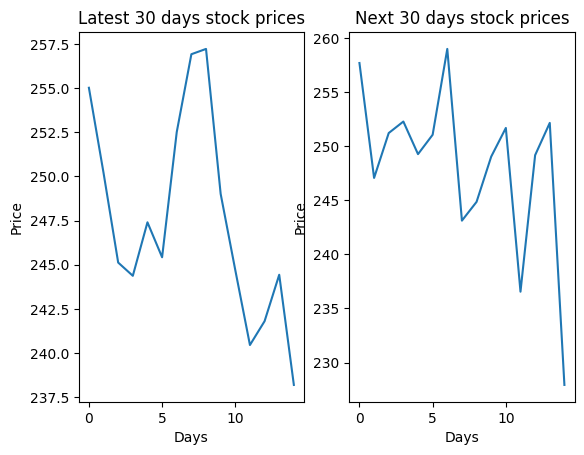

In [ ]:
#plotting and comparing stock prices
plt.subplot(1,2,1)
plt.plot(forecast2)
plt.title("Latest 30 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.plot(svm_prediction2)
plt.title("Next 30 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [ ]:
#Microsoft
df3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-23,491.243500,498.722595,490.351959,497.187164,478.040100,5962332
1,2015-12-24,497.236694,498.871185,493.472382,495.577423,476.492340,5492714
2,2015-12-28,495.602173,502.115448,495.304993,500.456177,481.183197,5946856
3,2015-12-29,500.456177,504.567200,498.846436,502.932709,483.564392,6882748
4,2015-12-30,502.734589,503.229889,496.295624,497.533875,478.373444,3761966
...,...,...,...,...,...,...,...
1725,2022-12-16,2571.000000,2618.800049,2558.149902,2565.600098,2565.600098,7308934
1726,2022-12-19,2581.000000,2604.000000,2566.699951,2599.300049,2599.300049,3567363
1727,2022-12-20,2583.899902,2626.000000,2566.000000,2621.800049,2621.800049,3446291
1728,2022-12-21,2621.000000,2633.000000,2576.100098,2584.500000,2584.500000,3935463


In [ ]:
#Microsoft
df3.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1725,2022-12-16,2571.000000,2618.800049,2558.149902,2565.600098,2565.600098,7308934
1726,2022-12-19,2581.000000,2604.000000,2566.699951,2599.300049,2599.300049,3567363
1727,2022-12-20,2583.899902,2626.000000,2566.000000,2621.800049,2621.800049,3446291
1728,2022-12-21,2621.000000,2633.000000,2576.100098,2584.500000,2584.500000,3935463
1729,2022-12-22,2598.000000,2604.649902,2566.750000,2577.800049,2577.800049,3438692


In [ ]:
df33 = df3[['Adj Close']]
df33[['Adj Close']].tail()

,Adj Close
1725,2565.600098
1726,2599.300049
1727,2621.800049
1728,2584.500000
1729,2577.800049


In [ ]:
df33['prediction3'] = df33[['Adj Close']].shift(-15)
print(df33)

        Adj Close  prediction3
0      478.040100   505.590027
1      476.492340   511.138153
2      481.183197   484.254913
3      483.564392   496.994141
4      478.373444   478.397278
...           ...          ...
1725  2565.600098          NaN
1726  2599.300049          NaN
1727  2621.800049          NaN
1728  2584.500000          NaN
1729  2577.800049          NaN

[1730 rows x 2 columns]


<ipython-input-45-82e76fd2317b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df33['prediction3'] = df33[['Adj Close']].shift(-15)


In [ ]:
#Create a data set X3 and convert it into numpy array , which will be having actual values
X3 = np.array(df33.drop(['prediction3'],1))
#removing last 15 rows
X3 = X3[:-15]
print(X3)

[[ 478.0401  ]
 [ 476.49234 ]
 [ 481.183197]
 ...
 [2712.199951]
 [2731.350098]
 [2723.300049]]


<ipython-input-46-1d6e19ac2d56>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X3 = np.array(df33.drop(['prediction3'],1))


In [ ]:
#Create a dataset y3 which will be having Predicted values and convert into numpy array
y3 = np.array(df33['prediction3'])
#remove last 15 rows
y3 = y3[:-15]
print(y3)

[ 505.590027  511.138153  484.254913 ... 2621.800049 2584.5
 2577.800049]


In [ ]:
# Spliting the data into train and test with 90 & 10 % respectively
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.1)

In [ ]:
# SVM Model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
#training the model
svr.fit(x3_train, y3_train)

SVR(C=1000.0, gamma=0.1)

In [ ]:
y3_pred = svr.predict(x3_test)
print(y3_pred)

[1626.50173541 1151.93282831  653.2248725  1331.4138341  2583.48514357
 2261.01663991 2510.12353838  524.4116765  2360.83809841 1120.90558939
 1087.77190688 2708.26019302 2568.57213664 1197.48701714 1976.49263407
 1273.66089852 1798.09191896  470.316709   2134.40146289 2400.74947275
 1505.48351979  446.32759843  472.15404026 2055.29601602 1519.68046804
 2518.88841403 2052.65596118 2452.21559876  639.7991052   476.90356761
 2444.12422113 2036.28415196  468.83417334 2421.92253889  571.59328047
  467.85083209 1119.2921652  1107.54225138 1230.59160146 1468.73999064
  478.35577902 2553.12534176  871.15353285 1626.48248084 2097.01188054
 1972.13988703 2446.87234974 2099.07384559  486.30853042 1908.29745906
 1824.58404855 2482.48372686 1417.36864346 2630.17229201 2045.82991811
 2122.35023089 2420.41613376 2619.26638485 1592.61517802 1626.48248084
 1490.69907368  781.8639719   487.56299717  484.19511983  960.01117406
 1702.11505439  754.15299599 2144.12222091 2549.49197679  472.04486647
 2384.

In [ ]:
#Microsoft
# The best possible score is 1.0
svm_confidence3 = svr.score(x3_test, y3_test)
print("svm_confidence3:", svm_confidence3)

svm_confidence3: 0.9513513016421211


In [ ]:
accuracy_score3 = int(svm_confidence3*100)

In [ ]:
print("accuracy_score3:",accuracy_score3)

accuracy_score3: 95


In [ ]:
#This is the latest 15 days stock prices, we will use these values to predict next 15 days prices
forecast3 = np.array(df33.drop(['prediction3'],1))[-15:]
print(forecast3)

[[2722.149902]
 [2682.449951]
 [2690.199951]
 [2650.5     ]
 [2649.25    ]
 [2609.100098]
 [2613.100098]
 [2625.      ]
 [2615.5     ]
 [2578.350098]
 [2565.600098]
 [2599.300049]
 [2621.800049]
 [2584.5     ]
 [2577.800049]]


<ipython-input-54-58e1d121c816>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  forecast3 = np.array(df33.drop(['prediction3'],1))[-15:]


Text(0, 0.5, 'Price')

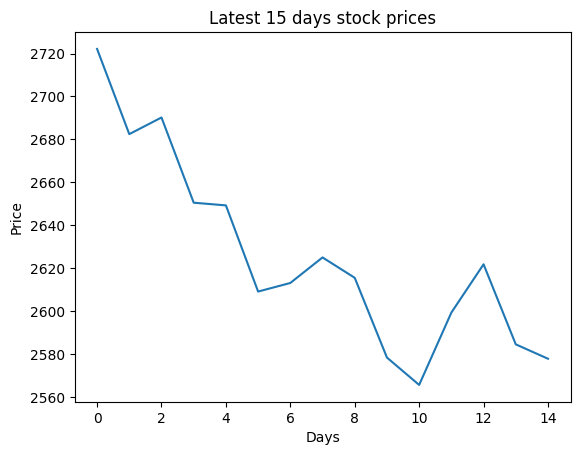

In [ ]:
plt.plot(forecast3)
plt.title("Latest 15 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')

In [ ]:
#Microsoft
svm_prediction3 = svr.predict(forecast3)
print(svm_prediction3)

[2452.15363678 1742.77556649 2441.05034623 2359.52077962 2527.47539985
 2659.72460401 2572.76370174 2451.43136881 2643.0189112  2561.63939796
 2719.72296648 2657.45974928 2266.61047067 2330.40753155 2534.64740554]


Text(0, 0.5, 'Price')

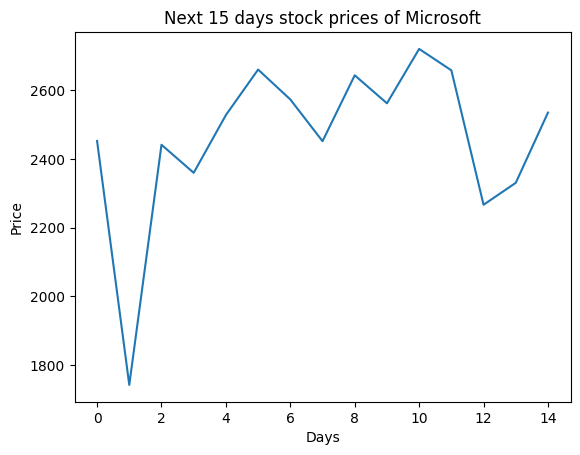

In [ ]:
plt.plot(svm_prediction3)
plt.title("Next 15 days stock prices of Microsoft")
plt.xlabel('Days')
plt.ylabel('Price')

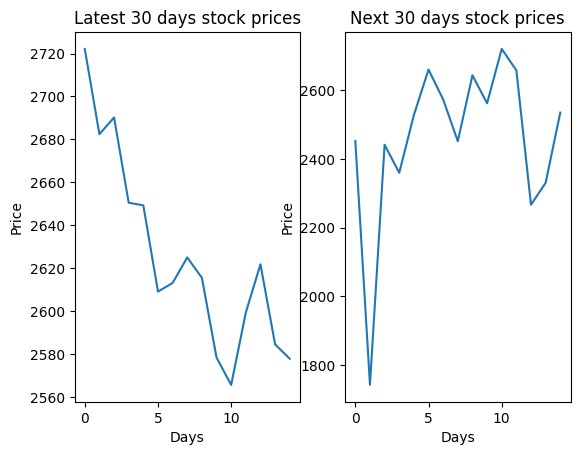

In [ ]:
#plotting and comparing stock prices
plt.subplot(1,2,1)
plt.plot(forecast3)
plt.title("Latest 30 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.plot(svm_prediction3)
plt.title("Next 30 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [ ]:
#Reliance
df4

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-23,38.227501,38.325001,37.899502,38.029499,38.029499,39632000
1,2016-12-27,38.169998,38.732498,38.060001,38.570000,38.570000,52774000
2,2016-12-28,38.812500,39.000000,38.525002,38.606499,38.606499,66020000
3,2016-12-29,38.619999,38.669998,38.042500,38.257500,38.257500,63166000
4,2016-12-30,38.323502,38.369999,37.414001,37.493500,37.493500,82788000
...,...,...,...,...,...,...,...
1505,2022-12-16,88.269997,89.349998,86.730003,87.860001,87.860001,146044000
1506,2022-12-19,87.510002,87.629997,84.510002,84.919998,84.919998,83531500
1507,2022-12-20,85.330002,86.610001,84.330002,85.190002,85.190002,74348300
1508,2022-12-21,86.180000,87.230003,85.209999,86.769997,86.769997,59267200


In [ ]:
#Reliance
df4.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1505,2022-12-16,88.269997,89.349998,86.730003,87.860001,87.860001,146044000
1506,2022-12-19,87.510002,87.629997,84.510002,84.919998,84.919998,83531500
1507,2022-12-20,85.330002,86.610001,84.330002,85.190002,85.190002,74348300
1508,2022-12-21,86.180000,87.230003,85.209999,86.769997,86.769997,59267200
1509,2022-12-22,85.519997,85.680000,82.250000,83.790001,83.790001,81270000


In [ ]:
df44 = df4[['Adj Close']]
df44[['Adj Close']].tail()

,Adj Close
1505,87.860001
1506,84.919998
1507,85.190002
1508,86.769997
1509,83.790001


In [ ]:
df44['prediction4'] = df44[['Adj Close']].shift(-15)
print(df44)

      Adj Close  prediction4
0     38.029499    40.374001
1     38.570000    40.452000
2     38.606499    40.416500
3     38.257500    40.894001
4     37.493500    41.122002
...         ...          ...
1505  87.860001          NaN
1506  84.919998          NaN
1507  85.190002          NaN
1508  86.769997          NaN
1509  83.790001          NaN

[1510 rows x 2 columns]


<ipython-input-62-3ae2229c9459>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df44['prediction4'] = df44[['Adj Close']].shift(-15)


In [ ]:
#Create a data set X and convert it into numpy array , which will be having actual values
X4 = np.array(df44.drop(['prediction4'],1))
#removing last 15 rows
X4 = X4[:-15]
print(X4)

[[38.029499]
 [38.57    ]
 [38.606499]
 ...
 [92.419998]
 [96.540001]
 [95.5     ]]


<ipython-input-63-f5c7b166ac4a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X4 = np.array(df44.drop(['prediction4'],1))


In [ ]:
#Create a dataset y4 which will be having Predicted values and convert into numpy array
y4 = np.array(df44['prediction4'])
#remove last 15 rows
y4 = y4[:-15]
print(y4)

[40.374001 40.452    40.4165   ... 85.190002 86.769997 83.790001]


In [ ]:
# Spliting the data into train and test with 90 & 10 % respectively
x4_train, x4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.1)

In [ ]:
# SVM Model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
#training the model
svr.fit(x4_train, y4_train)

SVR(C=1000.0, gamma=0.1)

In [ ]:
y4_pred = svr.predict(x4_test)
print(y4_pred)

[151.10753387  82.18149664 158.85750866 122.29246478  64.06237848
 162.27245997 160.65065186  49.00694723 130.51441178 122.76287392
 163.56861274  97.53018933 116.7115677  158.95450547  92.61821458
  93.10386966  94.66950751 123.61219233 159.3261555   41.98586898
  48.97178791 158.85916373 120.00039523 119.98990555 156.33239975
  65.21786702 158.07737084  90.40425566 167.85094021  83.08851471
 119.84512405  89.0309099   49.42365258 162.43640156  97.74785427
 135.9475128   87.12780535 120.87637807  93.25820211 158.51147167
 121.53884346 130.08853853  96.33592803  77.25627486  72.51093462
 171.36820116  97.35089251 159.56626739 115.1383916   61.22365858
  96.7404195  170.6207433   95.27097025  58.01339747  92.60939793
  90.2119835   93.36383236 169.86286228  42.37167388 161.23081189
 139.54184846 161.81740855 161.86180364  97.7038736   92.22734725
  72.47745264 158.70654831  81.44892436 159.36181599 122.53640721
 154.39586022  91.47733279  42.99236754  80.58185954  48.97802795
  49.76923

In [ ]:
#Reliance
# The best possible score is 1.0
svm_confidence4 = svr.score(x4_test, y4_test)
print("svm_confidence4:", svm_confidence4)

svm_confidence4: 0.9363763947934389


In [ ]:
accuracy_score4 = int(svm_confidence4*100)

In [ ]:
print("accuracy_score4:",accuracy_score4)

accuracy_score4: 93


In [ ]:
#This is the latest 15 days stock prices, we will use these values to predict next 15 days prices
forecast4 = np.array(df44.drop(['prediction4'],1))[-15:]
print(forecast4)

[[94.129997]
 [91.010002]
 [88.25    ]
 [88.459999]
 [90.349998]
 [89.089996]
 [90.550003]
 [92.489998]
 [91.580002]
 [88.449997]
 [87.860001]
 [84.919998]
 [85.190002]
 [86.769997]
 [83.790001]]


<ipython-input-71-a33a36f0d113>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  forecast4 = np.array(df44.drop(['prediction4'],1))[-15:]


Text(0, 0.5, 'Price')

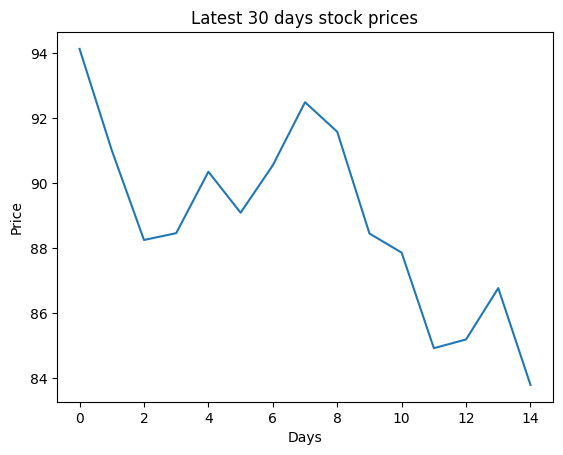

In [ ]:
plt.plot(forecast4)
plt.title("Latest 30 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')

In [ ]:
#Reliance
#Predicted Values for next 15 days stock prices
svm_prediction4 = svr.predict(forecast4)
print(svm_prediction4)

[97.80109086 92.58170412 89.06834738 89.17434371 91.73100804 89.76290281
 92.0177241  94.79842837 93.2160853  89.16834703 88.96653971 87.40361244
 88.01760139 89.00936112 83.63271677]


Text(0, 0.5, 'Price')

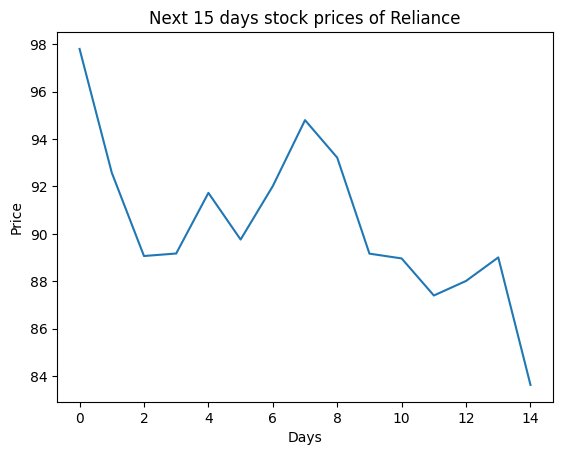

In [ ]:
plt.plot(svm_prediction4)
plt.title("Next 15 days stock prices of Reliance")
plt.xlabel('Days')
plt.ylabel('Price')

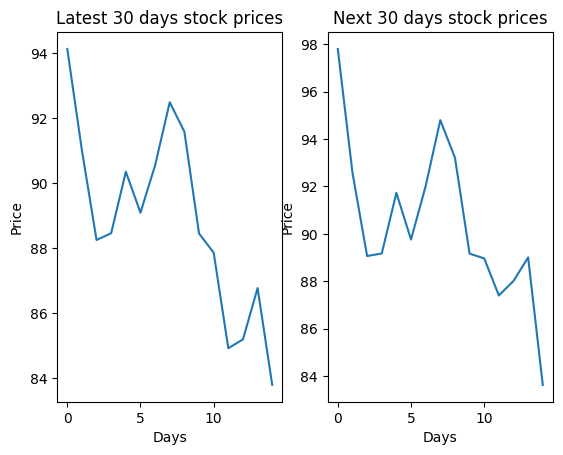

In [ ]:
#plotting and comparing stock prices
plt.subplot(1,2,1)
plt.plot(forecast4)
plt.title("Latest 30 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.plot(svm_prediction4)
plt.title("Next 30 days stock prices")
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [ ]:
#Apple
print(svm_prediction1)

[146.50701275 148.24419792 144.16651441 147.07536065 144.37602736
 144.98928325 146.34160586 148.93594696 144.08565404 140.79327944
 126.52546948 132.5566822  133.11713798 135.4531964  133.64183145]


In [ ]:
#Amazon
print(svm_prediction2)

[257.70319911 247.07449461 251.2265784  252.29005302 249.27498555
 251.06691297 259.006471   243.12365892 244.86073614 249.04414972
 251.69737612 236.55137184 249.17756453 252.16380202 227.92916594]


In [ ]:
#Microsoft
print(svm_prediction3)

[2452.15363678 1742.77556649 2441.05034623 2359.52077962 2527.47539985
 2659.72460401 2572.76370174 2451.43136881 2643.0189112  2561.63939796
 2719.72296648 2657.45974928 2266.61047067 2330.40753155 2534.64740554]


In [ ]:
#Reliance
print(svm_prediction4)

[97.80109086 92.58170412 89.06834738 89.17434371 91.73100804 89.76290281
 92.0177241  94.79842837 93.2160853  89.16834703 88.96653971 87.40361244
 88.01760139 89.00936112 83.63271677]


In [ ]:
import webbrowser
f=open("homepage.html","w")
message='''
<!DOCTYPE html>
<html lang="en">
<head>
    <title>Home page</title>
</head>
<body bgcolor="white">
<style>
	body{
		background-image:url("https://static.vecteezy.com/system/resources/previews/002/062/706/original/business-candle-stick-graph-chart-of-stock-market-investment-trading-on-white-background-design-bullish-point-trend-of-graph-illustration-vector.jpg");
		background-repeat:no-repeat;
		background-size:cover;
	}
	select{
padding:15px 32px;
font-size:20px;
background-color:white;
}
button{
padding:10px 25px;
font-size:20px;
background-color:white;
}

</style>
    <h1 align="center" ><b><u>WELCOME TO STOCK PREDICTOR</u></b></h1>
    
    <center><h2>
		Don't know which stock to sell or buy? Checkout our predictions and get a brief idea about 
		           the stock behaviour.<br> You can view the behaviour for upto 15 days! </h2><br>
	<h1>Top stocks</h1>
	<h2>Select any company to predict stock prices </h2>
	<style>
	h1{
		color:#800000;
	}
	h2{
		color:#151B54;
	}
	input.right{
	    float:right;
		
		}
	</style>
	
	<form>
	<select onchane="la(this.value)" onchange="location=this.value;">
		<option disabled selected>Choose</option>
		<option value="amazon val.html">Amazon</option>
		<option value="apple val.html">Apple</option>
		<option value="microsoft val.html">Microsoft</option>
		<option value="reliance val.html">Reliance</option>
	</select>
</form>
	<h1 align ="right">
	<a href="check accuracy.html"><button>Check Accuracy</button></a></h1>
	
	
	
	
	
	 </center>
</body>
</html>

'''
f.write(message)
f.close()
webbrowser.open_new_tab("homepage.html")
print("successfully executed")

successfully executed
